<a href="https://colab.research.google.com/github/antoniogss/Statistics/blob/main/resolucao_lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Módulos/Submódulos Python

In [ ]:
#@title
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt
import statistics as st
import math

from openpyxl import load_workbook
from pathlib import Path
from matplotlib.ticker import PercentFormatter

war.filterwarnings('ignore')

#Conexão com o Google Drive

In [ ]:
#@title
gc.drive.mount('./gdrive/', 
               force_remount=True
              )

gc.output.clear()

#Configurando o diretório de trabalho

In [ ]:
#@title
%cd ./gdrive/MyDrive/TED/listas_19-05/

/content/gdrive/MyDrive/TED/listas_19-05


#Lista de planilhas

In [ ]:
#@title
# df = pd.read_excel('lista_1.xlsx', sheet_name=1) #0,1,2,3,4...
# print(df)

In [ ]:
#@title
wb = load_workbook('lista_1.xlsx',
                   read_only=True
                  )
wb.sheetnames

[' Introdução - atividade ED',
 'Tendencia central e dispersão ',
 ' frequencia e histograma 1',
 'Freuquencia e histograma',
 'frequencia_histograma',
 'box-plot',
 'ramo e folhas',
 'Diagrama de pontos',
 'Case 1']

#Tendência central e dispersão

##Questão 1)

In [ ]:
#@title
ws = wb['Tendencia central e dispersão ']
ws['B1'].value

'questão 1: As medidas do teor de Fe em 6 amostras de solo foram realizadas por 3 analistas. Os resultados estão discriminados na Tabela abaixo. De posse dessas informações, determine: Média, mediana e moda, desvio padrão, desvio padrao relativo, variância, quartis, amplitude. Quais das medidas de tendência central é mais adequada para este caso? Interprete os resultados em termos da variabilidade dos dados, bem como com relação a erros sitemáticos e aleatórios.'

In [ ]:
#@title
# Read the cell values into a list of lists
data_rows = []
for row in ws['A6':'C12']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)
# Transform into dataframe
df_1 = pd.DataFrame(data_rows)
df_1.rename(columns=df_1.iloc[0], inplace = True)
df_1.drop(df_1.index[0], inplace = True)
# print(ws['A5'].value)
# print('\n')
# print(df_1)

In [ ]:
#@title
#Converting string to numeric
df_1['Analista A'] = pd.to_numeric(df_1['Analista A'])
df_1['Analista B'] = pd.to_numeric(df_1['Analista B'])
df_1['Analista C'] = pd.to_numeric(df_1['Analista C'])

###Tabela 1: tendência central

In [ ]:
df_1.describe()

,Analista A,Analista B,Analista C
count,6.000000,6.000000,6.000000
mean,5.000000,5.000000,5.000000
std,0.894427,3.577709,4.049691
min,4.000000,1.000000,1.000000
25%,4.250000,2.000000,1.250000
50%,5.000000,5.000000,5.000000
75%,5.750000,8.000000,8.750000
max,6.000000,9.000000,9.000000


###Tabela 2: medidas de dispersão

In [ ]:
#@title
""" 
Customized Percentiles
df.describe(percentiles=[0.1, 0.3, 0.7])
"""

# df_2 = df_1.describe()

df_3 = df_1.agg(['std','var']) #'median'

a = df_1['Analista A']
b = df_1['Analista B']
c = df_1['Analista C']

data  = [['coeff de var',a.std()/a.mean(),b.std()/b.mean(),c.std()/c.mean()],
         ['amplitude',a.max()-a.min(),b.max()-b.min(),c.max()-c.min()]]

df_4 = pd.DataFrame(data, columns =['','Analista A','Analista B','Analista C']) 
df_4.set_index('', inplace=True) 

df = pd.concat([df_3,df_4], axis=0) #df_2
df = df.astype(float)

df

,Analista A,Analista B,Analista C
std,0.894427,3.577709,4.049691
var,0.800000,12.800000,16.400000
coeff de var,0.178885,0.715542,0.809938
amplitude,2.000000,8.000000,8.000000


In [ ]:
#@title
# get the column name of max values in every row
maxValueIndexObj = df.idxmax(axis=1)
print("Valores máximos de cada linha nas colunas :")
print('\n')
print(maxValueIndexObj)

Valores máximos de cada linha nas colunas :


std             Analista C
var             Analista C
coeff de var    Analista C
amplitude       Analista B
dtype: object


In [ ]:
#@title
# Get a series containing maximum value of each row
# maxValuesObj = df.max(axis=1)
# print('Maximum value in each row : ')
# print('\n')
# print(maxValuesObj)

In [ ]:
#@title
data  = [['mode',[a.mode()],[b.mode()],[c.mode()]]]

df_5 = pd.DataFrame(data, columns =['','Analista A','Analista B','Analista C']) 
df_5.set_index('', inplace=True) 
df_5

,Analista A,Analista B,Analista C
,,,
mode,"[[4, 5, 6]]","[[1, 5, 9]]","[[1, 9]]"


###Interpretação dos resultados

Como nos conjuntos de dados apresentados, há um ou mais dados que se afastam do geral das observações (valores discrepantes ou outliers) a média
passa a ser uma medida de tendência central inadequada, sendo
a mediana uma medida mais indicada.
$$ \\ $$
Está evidente que o Analista A apresentou o melhor desempenho, pois a dispersão das medidas em torno da média é menor, ou seja, o Analista A apresentou o maior número de medidas de dispersão com os menores valores comparativamente.
$$ \\ $$
Erros Sistemáticos (ou Determinados) são Resultantes de desvios constantes nos
resultados num mesmo sentido. São erros que podem ser detectadoss, evitados ou
corrigidos. Erros Aleatórios (ou Indeterminados) são resultantes da impossibilidade de se manter os fatores rigidamente iguais, logo, são resultantes de efeitos de variáveis incontroláveis nas medidas. As variações são, portanto inerentes ao sistema, irregulares e resultam em variabilidade. Estes erros podem ser submetidos a um tratamento estatístico que permite saber qual o valor mais provável e também a precisão de uma série de medidas.







##Questão 2)

In [ ]:
#@title
ws = wb['Tendencia central e dispersão ']
ws['Q1'].value

'Questão 2: Dois procedimentos (A e B) de precipitação de proteínas em plasma humano, foram testados. Os resultados obtidos estão compilados na tabela abaixo. De posse dessas informações, determine: as medidas de tendêncioa central e dispersao dos dados e apresente em uma tabela. Interprete os resultados obtidos.'

In [ ]:
#@title
# Read the cell values into a list of lists
data_rows = []
for row in ws['P7':'R17']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)
# Transform into dataframe
df_6 = pd.DataFrame(data_rows)
df_6.rename(columns=df_6.iloc[0], inplace = True)
df_6.drop(df_6.index[0], inplace = True)
df_6.drop('Réplicas', axis=1, inplace=True)
df_6 = df_6.astype(float)
# print(ws['P4'].value)
# print('\n')
# print(df_6)

In [ ]:
#@title
df_6.describe()

,Método A,Método B
count,10.000000,10.000000
mean,20.300000,102.300000
std,3.743142,4.854551
min,14.000000,91.000000
25%,19.000000,100.500000
50%,20.000000,103.500000
75%,21.750000,104.750000
max,28.000000,108.000000


In [ ]:
#@title
df_7 = df_6.agg(['std','var'])

a = df_6['Método A']
b = df_6['Método B']

data  = [['coeff of var',a.std()/a.mean(),b.std()/b.mean()],
         ['amplitude',a.max()-a.min(),b.max()-b.min()]]

df_8 = pd.DataFrame(data, columns =['','Método A','Método B']) 
df_8.set_index('', inplace=True) 

df = pd.concat([df_7,df_8], axis=0) #df_6
df = df.astype(float)
df

,Método A,Método B
std,3.743142,4.854551
var,14.011111,23.566667
coeff of var,0.184391,0.047454
amplitude,14.000000,17.000000


In [ ]:
#@title
# get the column name of max values in every row
maxValueIndexObj = df.idxmax(axis=1)
print("Valores máximos de cada linha nas colunas :")
print('\n')
print(maxValueIndexObj)

Valores máximos de cada linha nas colunas :


std             Método B
var             Método B
coeff of var    Método A
amplitude       Método B
dtype: object


In [ ]:
#@title
data  = [['mode',[a.mode()],[b.mode()]]]

df_5 = pd.DataFrame(data, columns =['','Método A','Método B']) 
df_5.set_index('', inplace=True) 
df_5

,Método A,Método B
,,
mode,[[19.0]],[[104.0]]


###Tabela

In [ ]:
#@title
""" 
Customized Percentiles
df.describe(percentiles=[0.1, 0.3, 0.7])
"""

df_7 = df_6.describe()

df_8 = df_6.agg(['median','var'])

a = df_6['Método A']
b = df_6['Método B']

data  = [['coeff of var',a.std()/a.mean(),b.std()/b.mean()],
         ['amplitude',a.max()-a.min(),b.max()-b.min()]]

df_9 = pd.DataFrame(data, columns =['','Método A','Método B']) 
df_9.set_index('', inplace=True) 

df = pd.concat([df_7,df_8,df_9], axis=0) #df_2
df = df.astype(float)
df

,Método A,Método B
count,10.000000,10.000000
mean,20.300000,102.300000
std,3.743142,4.854551
min,14.000000,91.000000
25%,19.000000,100.500000
50%,20.000000,103.500000
75%,21.750000,104.750000
max,28.000000,108.000000
median,20.000000,103.500000
var,14.011111,23.566667


###Interpretação dos resultados

Como nos conjuntos de dados apresentados, há um ou mais dados que se afastam do geral das observações (valores discrepantes ou outliers) a média passa a ser uma medida de tendência central inadequada, sendo a mediana uma medida mais indicada.
$$ \\ $$
Está evidente que o Método A apresentou o melhor desempenho, pois a dispersão das medidas em torno da média é menor, ou seja, o Método A apresentou o maior número de medidas de dispersão com os menores valores comparativamente.

#Frequência e histograma - Parte 1

In [ ]:
#@title
ws = wb[' frequencia e histograma 1']
ws['E2'].value

'Considerando o monitoramento da temperatura de uma reação química, apresentados na Tabela abaixo, monte e organize uma tabela de distribuição de frequência por intervalos e plote os histogramas responda as seguintes questões: '

In [ ]:
#@title
# Read the cell values into a list of lists
data_rows = []
for row in ws['B3':'C71']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)
# Transform into dataframe
df = pd.DataFrame(data_rows)
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df = df.astype(float)
df.head()

,Reação,Temperatura
1,1.0,95.0
2,2.0,98.0
3,3.0,99.0
4,4.0,100.0
5,5.0,101.0


In [ ]:
#@title
plt.style.use('fivethirtyeight')

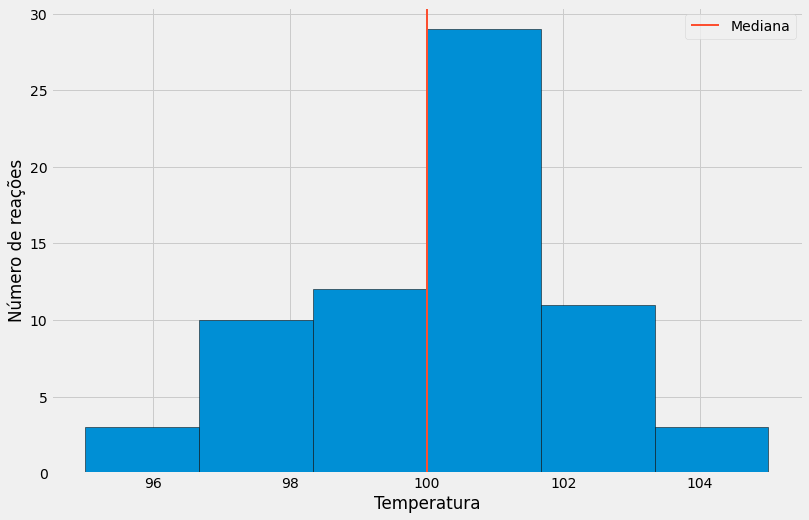

In [ ]:
#@title
temp = df['Temperatura']

plt.figure(figsize=(12,8))
plt.hist(temp, bins=6, edgecolor='black')
#density=True, probability density distribution
median_temp = temp.median()
color='#fc4f30'

plt.axvline(median_temp,
            color=color,
            label='Mediana',
            linewidth=2
          )

plt.legend()
# plt.title('Temperatura de reação')
plt.xlabel('Temperatura')
plt.ylabel('Número de reações')
plt.show()

##a)	% de resultados iguais ou superiores a uma temperatura de 80 °C.

In [ ]:
#@title
r_1 = (sum(i > 80 for i in temp) / len(temp))*100
print('Resposta:',r_1, '%')

Resposta: 100.0 %


		
##b)	% de resultados entre 96 °C  e 100 °C. 											


In [ ]:
#@title
r_2 = (sum(i < 100 and i > 96 for i in temp) / len(temp))*100 

print('Resposta:',round(r_2,1), '%')

Resposta: 32.4 %


##c)	Número de resultados menores que 97 °C.													


In [ ]:
#@title
r_3 = sum(i < 97 for i in temp)
print('Resposta:', r_3)

Resposta: 3


##d) 	Quantas reações química apresentaram temperatura maior que 100  °C?													


In [ ]:
#@title
r_4 = sum(i > 100 for i in temp)
print('Resposta:', r_4)

Resposta: 25


##e)	 Coniderando que a temperatura ideal da reação química é de 100  °C quantas reações químicas não apresentaram temperatura adequada?

In [ ]:
#@title
r_5 = sum(i != 100.0 for i in temp)
print('Resposta:', r_5)

Resposta: 50


#Frequência e histograma - Parte 2

In [ ]:
#@title
ws = wb['Freuquencia e histograma']
ws['B3'].value

'Nos exercícios 31 a 34, construa uma distribuição de frequência e um histograma de frequência para o conjunto de dados. Descreva suas interpretações'

##1) Número de vendas no ano de 2020	

In [ ]:
#@title
data = {'vendedor':  list(range(1,22+1)),
        'num_vendas_2020': [2114,	2468,	7119,	1876,	4105,	3183,
                            1932,	1355,	4278,	1030,	2000,	1077,
                            5835,	1512,	1697,	2478,	3981,	1643,
                            1858,	1500,	4608,	1000]
        }

df = pd.DataFrame(data)
df.set_index('vendedor', inplace = True)

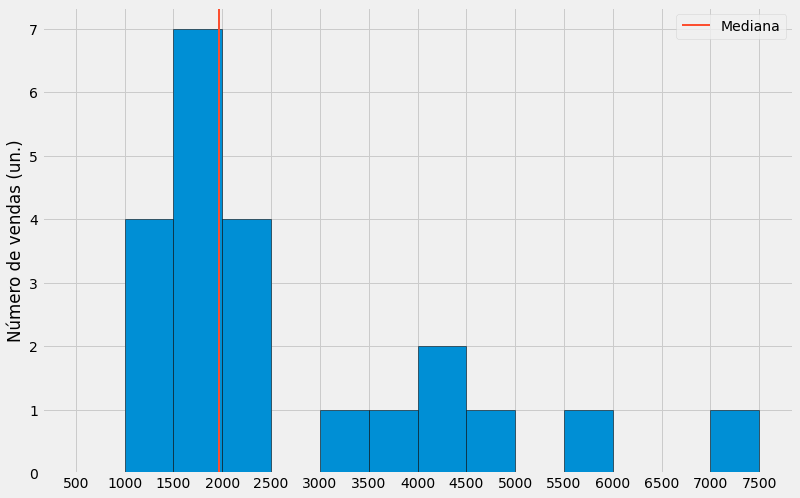

In [ ]:
#@title
amostra = df['num_vendas_2020']

step = 500
bins=np.arange(amostra.min()-step, amostra.max()+step, step)

plt.figure(figsize=(12,8))
plt.hist(amostra, bins=bins, edgecolor='black')
median_conc = amostra.median()
color='#fc4f30'

plt.axvline(median_conc,
            color=color,
            label='Mediana',
            linewidth=2
          )

plt.legend()
# plt.title('Temperatura de reação')
plt.xlabel('')
plt.ylabel('Número de vendas (un.)')
plt.xticks(bins)
# plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

In [ ]:
#@title
#Set bin sizes
step = 500
bins = list(range(df['num_vendas_2020'].min() - step, df['num_vendas_2020'].max() + step, step))

#Give list
sample = df['num_vendas_2020']

df.rename(columns={'num_vendas_2020' : 'nums'}, inplace = True)

#Put into dataframe
newdf = pd.DataFrame(pd.cut(df['nums'], bins=bins).value_counts()).sort_index()
newdf.reset_index(inplace=True)

#Convert to String
newdf['index'] = newdf['index'].astype(str)

#Set 'easy-to-read' names for bins
left = newdf['index'].str.split(',').str[0].str.split('(').str[1].astype('int32') + 1
right = newdf['index'].str.split(',').str[1].str.split(']').str[0]

fullname = left.astype(str) + ' -' + right
newdf['index'] = fullname

#cummulative frequency
newdf['cumfreq'] = newdf['nums'].cumsum()

#relative frequency
newdf['relfreq'] = round(newdf['nums'] / newdf['nums'].sum()*100,1)

#cummulative relative frequency
newdf['cumrelfreq'] = round(newdf['relfreq'].cumsum())

#Add column names
newdf.columns =['Intervalo de tempo (s)', 
                'Frequência simples', 
                'Frequência simples acumulada',
                'Frequência relativa (%)', 
                'Frequência relativa acumulada (%)']

#Show frequency table
newdf

,Intervalo de tempo (s),Frequência simples,Frequência simples acumulada,Frequência relativa (%),Frequência relativa acumulada (%)
0,501 - 1000,1,1,4.5,4.0
1,1001 - 1500,4,5,18.2,23.0
2,1501 - 2000,7,12,31.8,54.0
3,2001 - 2500,3,15,13.6,68.0
4,2501 - 3000,0,15,0.0,68.0
5,3001 - 3500,1,16,4.5,73.0
6,3501 - 4000,1,17,4.5,77.0
7,4001 - 4500,2,19,9.1,86.0
8,4501 - 5000,1,20,4.5,91.0
9,5001 - 5500,0,20,0.0,91.0


##2) Rendimento de uma reação química (%)	

In [ ]:
#@title
data = {'amostras':  list(range(1,24+1)),
        'rendimento': [35,	51,	44,	42,	37,	38,	36,	39,
                       44,	43,	40,	40,	32,	39,	41,	38,
                       42,	39,	40,	46,	37,	35,	41,	39,]
        }

df = pd.DataFrame(data)
df.set_index('amostras', inplace = True)

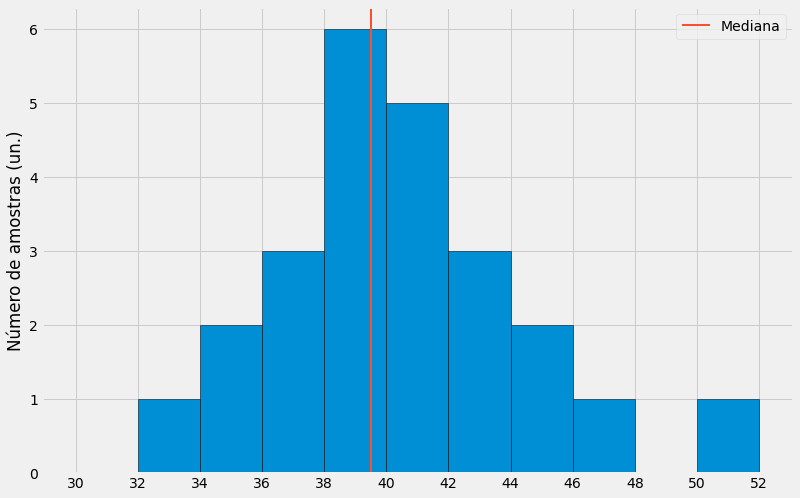

In [ ]:
#@title
amostra = df['rendimento']

step = 2
bins=np.arange(amostra.min()-step, amostra.max()+step,step)

plt.figure(figsize=(12,8))
plt.hist(amostra, bins=bins, edgecolor='black')
median_conc = amostra.median()
color='#fc4f30'

plt.axvline(median_conc,
            color=color,
            label='Mediana',
            linewidth=2
          )

plt.legend()
# plt.title('Temperatura de reação')
plt.xlabel('')
plt.ylabel('Número de amostras (un.)')
plt.xticks(bins)
# plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

In [ ]:
#@title
#Set bin sizes
step = 2
bins = list(range(df['rendimento'].min() - step, df['rendimento'].max() + step, step))

#Give list
sample = df['rendimento']

df.rename(columns={'rendimento' : 'nums'}, inplace = True)

#Put into dataframe
newdf = pd.DataFrame(pd.cut(df['nums'], bins=bins).value_counts()).sort_index()
newdf.reset_index(inplace=True)

#Convert to String
newdf['index'] = newdf['index'].astype(str)

#Set 'easy-to-read' names for bins
left = newdf['index'].str.split(',').str[0].str.split('(').str[1].astype('int32') + 1
right = newdf['index'].str.split(',').str[1].str.split(']').str[0]

fullname = left.astype(str) + ' -' + right
newdf['index'] = fullname

#cummulative frequency
newdf['cumfreq'] = newdf['nums'].cumsum()

#relative frequency
newdf['relfreq'] = round(newdf['nums'] / newdf['nums'].sum()*100,1)

#cummulative relative frequency
newdf['cumrelfreq'] = round(newdf['relfreq'].cumsum())

#Add column names
newdf.columns =['Intervalo de tempo (s)', 
                'Frequência simples', 
                'Frequência simples acumulada',
                'Frequência relativa (%)', 
                'Frequência relativa acumulada (%)']

#Show frequency table
newdf

,Intervalo de tempo (s),Frequência simples,Frequência simples acumulada,Frequência relativa (%),Frequência relativa acumulada (%)
0,31 - 32,1,1,4.2,4.0
1,33 - 34,0,1,0.0,4.0
2,35 - 36,3,4,12.5,17.0
3,37 - 38,4,8,16.7,33.0
4,39 - 40,7,15,29.2,63.0
5,41 - 42,4,19,16.7,79.0
6,43 - 44,3,22,12.5,92.0
7,45 - 46,1,23,4.2,96.0
8,47 - 48,0,23,0.0,96.0
9,49 - 50,0,23,0.0,96.0


##3) Níveis de proteína (mg) em urina de rato.

In [ ]:
#@title
data = {'amostras':  list(range(1,30+1)),
        'nivel_proteina': [507,	389,	305,	291,	336,	310,	514,	442,
                       373,	428,	387,	454,	323,	441,	388,	426,
                       411,	382,	320,	450,	309,	416,	359,	388,
                       307,	337,	469,	351,	422,	413]
        }

df = pd.DataFrame(data)
df.set_index('amostras', inplace = True)

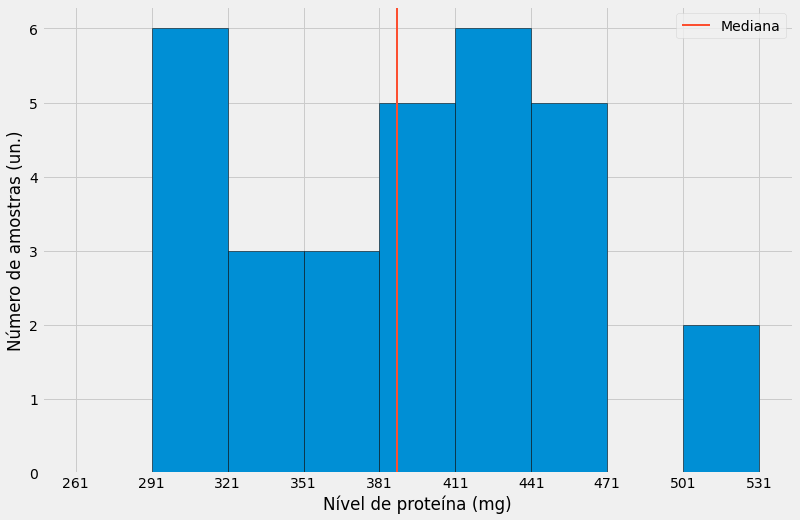

In [ ]:
#@title
amostra = df['nivel_proteina']

step = 30
bins=np.arange(amostra.min()-step, amostra.max()+step,step)

plt.figure(figsize=(12,8))
plt.hist(amostra, bins=bins, edgecolor='black')
median_conc = amostra.median()
color='#fc4f30'

plt.axvline(median_conc,
            color=color,
            label='Mediana',
            linewidth=2
          )

plt.legend()
# plt.title('Temperatura de reação')
plt.xlabel('Nível de proteína (mg)')
plt.ylabel('Número de amostras (un.)')
plt.xticks(bins)
# plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

In [ ]:
#@title
#Set bin sizes
step = 30
bins = list(range(df['nivel_proteina'].min() - step, df['nivel_proteina'].max() + step, step))

#Give list
sample = df['nivel_proteina']

df.rename(columns={'nivel_proteina' : 'nums'}, inplace = True)

#Put into dataframe
newdf = pd.DataFrame(pd.cut(df['nums'], bins=bins).value_counts()).sort_index()
newdf.reset_index(inplace=True)

#Convert to String
newdf['index'] = newdf['index'].astype(str)

#Set 'easy-to-read' names for bins
left = newdf['index'].str.split(',').str[0].str.split('(').str[1].astype('int32') + 1
right = newdf['index'].str.split(',').str[1].str.split(']').str[0]

fullname = left.astype(str) + ' -' + right
newdf['index'] = fullname

#cummulative frequency
newdf['cumfreq'] = newdf['nums'].cumsum()

#relative frequency
newdf['relfreq'] = round(newdf['nums'] / newdf['nums'].sum()*100,1)

#cummulative relative frequency
newdf['cumrelfreq'] = round(newdf['relfreq'].cumsum())

#Add column names
newdf.columns =['Intervalo de tempo (s)', 
                'Frequência simples', 
                'Frequência simples acumulada',
                'Frequência relativa (%)', 
                'Frequência relativa acumulada (%)']

#Show frequency table
newdf

,Intervalo de tempo (s),Frequência simples,Frequência simples acumulada,Frequência relativa (%),Frequência relativa acumulada (%)
0,262 - 291,1,1,3.3,3.0
1,292 - 321,5,6,16.7,20.0
2,322 - 351,4,10,13.3,33.0
3,352 - 381,2,12,6.7,40.0
4,382 - 411,6,18,20.0,60.0
5,412 - 441,6,24,20.0,80.0
6,442 - 471,4,28,13.3,93.0
7,472 - 501,0,28,0.0,93.0
8,502 - 531,2,30,6.7,100.0


##4)Tempo em horas  de um procedimento de precipitação de proteína

In [ ]:
#@title
data = {'procedimentos':  list(range(1,20+1)),
        'tempo_ppt_proteina': [1595,	1472,	1820,	1580,	1804,	1635,
                               1959,	2020,	1480,	1250,	2083,	1522,
                               1306,	1572,	1778,	2296,	1445,	1716,
                               1618,	1824]
        }

df = pd.DataFrame(data)
df.set_index('procedimentos', inplace = True)

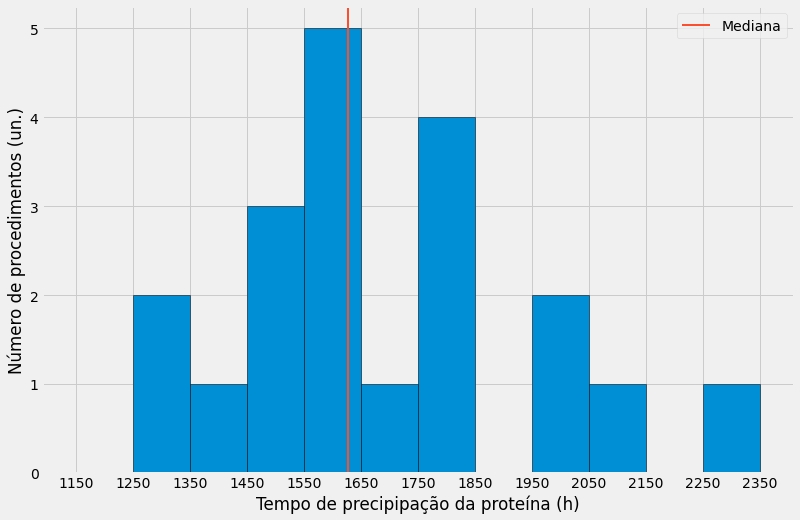

In [ ]:
#@title
amostra = df['tempo_ppt_proteina']

step = 100
bins=np.arange(amostra.min()-step, amostra.max()+step,step)

plt.figure(figsize=(12,8))
plt.hist(amostra, bins=bins, edgecolor='black')
median_conc = amostra.median()
color='#fc4f30'

plt.axvline(median_conc,
            color=color,
            label='Mediana',
            linewidth=2
          )

plt.legend()
# plt.title('Temperatura de reação')
plt.xlabel('Tempo de precipipação da proteína (h)')
plt.ylabel('Número de procedimentos (un.)')
plt.xticks(bins)
# plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

In [ ]:
#@title
#Set bin sizes
step = 100
bins = list(range(df['tempo_ppt_proteina'].min() - step, df['tempo_ppt_proteina'].max() + step, step))

#Give list
sample = df['tempo_ppt_proteina']

df.rename(columns={'tempo_ppt_proteina' : 'nums'}, inplace = True)

#Put into dataframe
newdf = pd.DataFrame(pd.cut(df['nums'], bins=bins).value_counts()).sort_index()
newdf.reset_index(inplace=True)

#Convert to String
newdf['index'] = newdf['index'].astype(str)

#Set 'easy-to-read' names for bins
left = newdf['index'].str.split(',').str[0].str.split('(').str[1].astype('int32') + 1
right = newdf['index'].str.split(',').str[1].str.split(']').str[0]

fullname = left.astype(str) + ' -' + right
newdf['index'] = fullname

#cummulative frequency
newdf['cumfreq'] = newdf['nums'].cumsum()

#relative frequency
newdf['relfreq'] = round(newdf['nums'] / newdf['nums'].sum()*100,1)

#cummulative relative frequency
newdf['cumrelfreq'] = round(newdf['relfreq'].cumsum())

#Add column names
newdf.columns =['Intervalo de tempo (s)', 
                'Frequência simples', 
                'Frequência simples acumulada',
                'Frequência relativa (%)', 
                'Frequência relativa acumulada (%)']

#Show frequency table
newdf

,Intervalo de tempo (s),Frequência simples,Frequência simples acumulada,Frequência relativa (%),Frequência relativa acumulada (%)
0,1151 - 1250,1,1,5.0,5.0
1,1251 - 1350,1,2,5.0,10.0
2,1351 - 1450,1,3,5.0,15.0
3,1451 - 1550,3,6,15.0,30.0
4,1551 - 1650,5,11,25.0,55.0
5,1651 - 1750,1,12,5.0,60.0
6,1751 - 1850,4,16,20.0,80.0
7,1851 - 1950,0,16,0.0,80.0
8,1951 - 2050,2,18,10.0,90.0
9,2051 - 2150,1,19,5.0,95.0


#Frequência e histograma - Parte 3

In [ ]:
#@title
ws = wb['frequencia_histograma']
ws['A3'].value

'A concentração de manganês (mg/kg) em grãos de café foi determinada por espectrometria de emissão atômica com plasma indutivamente acoplado. De posse das informações da Tabela 1 preencha a tabela 2 e responda  as questões a), b), c), d) e e).'

##Tabela 1

In [ ]:
#@title
# Read the cell values into a list of lists
data_rows = []
for row in ws['H5':'I58']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)
# Transform into dataframe
df = pd.DataFrame(data_rows)
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df = df.astype('int64')
df.head()

,Amostras,Amotras ordenadas
1,1,27
2,2,27
3,3,28
4,4,28
5,5,28


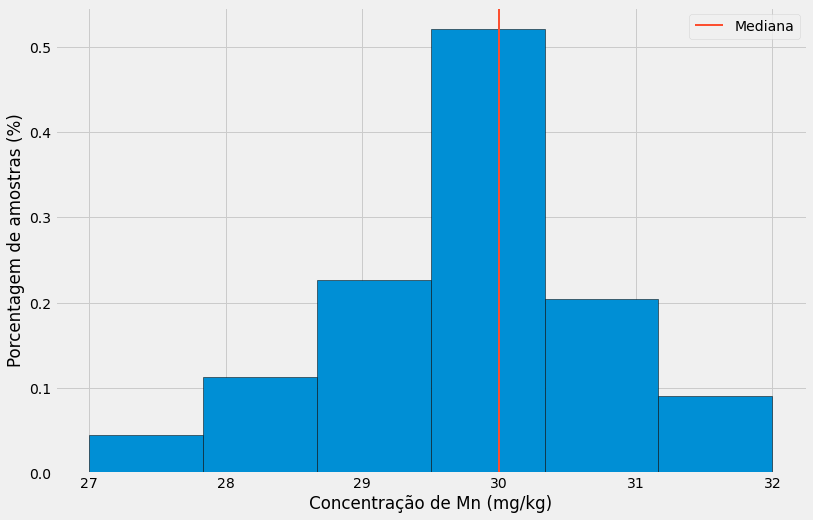

In [ ]:
#@title
amostra = df['Amotras ordenadas']

plt.figure(figsize=(12,8))
plt.hist(amostra, density=True, bins=6, edgecolor='black')
median_conc = amostra.median()
color='#fc4f30'

plt.axvline(median_conc,
            color=color,
            label='Mediana',
            linewidth=2
          )

plt.legend()
# plt.title('Temperatura de reação')
plt.xlabel('Concentração de Mn (mg/kg)')
plt.ylabel('Porcentagem de amostras (%)')
plt.show()

##a) Qual a porcentagem dos resultados que apresentaram concentração maior que 30?						

In [ ]:
#@title
r_1 = (sum(i > 30 for i in amostra) / len(amostra))*100
print('Resposta:',round(r_1, 1), '%')

Resposta: 24.5 %


##b) Qual a porcentagem de resultados menores que 30?					

In [ ]:
#@title
r_2 = (sum(i < 30 for i in amostra) / len(amostra))*100
print('Resposta:',round(r_2, 1), '%')

Resposta: 32.1 %


##c) Qual a porcentagem de resultados entre 29 (inclusive) e 31 (Inclusive)?						

In [ ]:
#@title
r_3 = (sum(i <= 31 and i >= 29 for i in amostra) / len(amostra))*100 
print('Resposta:',round(r_3, 1), '%')

Resposta: 79.2 %


##d) Qual a porcentagem de resultados entre 27 (inclusive) e 29 (inclusive)?						

In [ ]:
#@title
r_4 = (sum(i <= 29 and i >= 27 for i in amostra) / len(amostra))*100 
print('Resposta:',round(r_4, 1), '%')

Resposta: 32.1 %


##e) A concentração que se repetiu com maior número de vezes foi:						

In [ ]:
#@title
print('Resposta:')
amostra.mode()

Resposta:


0    30
dtype: int64

##Tabela 2

Distribuição de Frequências

In [ ]:
#@title
#Set bin sizes
step = 2
bins = list(range(amostra.min() - step, amostra.max() + step, step))

# def round_up(n, decimals=0):
#     multiplier = 10 ** decimals
#     return math.ceil(n * multiplier) / multiplier

#Number of intervals
n_int = ((amostra.max()+step) - (amostra.min()-step)) / step
print('Número de intervalos:', round(n_int + 1))

Número de intervalos: 6


In [ ]:
#@title
#Give list
sample = df['Amotras ordenadas']

df.rename(columns={'Amotras ordenadas' : 'nums'}, inplace = True)

#Put into dataframe
newdf = pd.DataFrame(pd.cut(df['nums'], bins=bins).value_counts()).sort_index()
newdf.reset_index(inplace=True)

#Convert to String
newdf['index'] = newdf['index'].astype(str)

#Set 'easy-to-read' names for bins
left = newdf['index'].str.split(',').str[0].str.split('(').str[1].astype('int32') + 1
right = newdf['index'].str.split(',').str[1].str.split(']').str[0]

fullname = left.astype(str) + ' -' + right
newdf['index'] = fullname

#cummulative frequency
newdf['cumfreq'] = newdf['nums'].cumsum()

#relative frequency
newdf['relfreq'] = round(newdf['nums'] / newdf['nums'].sum()*100,1)

#cummulative relative frequency
newdf['cumrelfreq'] = round(newdf['relfreq'].cumsum())

#Add column names
newdf.columns =['Intervalo de concentração (mg/kg)', 
                'Frequência simples', 
                'Frequência simples acumulada',
                'Frequência relativa', 
                'Frequência relativa acumulada ']

#Show frequency table
newdf

,Intervalo de concentração (mg/kg),Frequência simples,Frequência simples acumulada,Frequência relativa,Frequência relativa acumulada
0,26 - 27,2,2,3.8,4.0
1,28 - 29,15,17,28.3,32.0
2,30 - 31,32,49,60.4,92.0
3,32 - 33,4,53,7.5,100.0


#Boxplot

##Teor de Ca

In [ ]:
#@title
ws = wb['box-plot']
ws['A2'].value

'Dois métodos analíticos foram comparados para a determinação de Ca em leite. Os resultados estão descritos abaixo:'

In [ ]:
#@title
# Read the cell values into a list of lists
data_rows = []
for row in ws['A4':'B14']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)
# Transform into dataframe
df = pd.DataFrame(data_rows)
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df = df.astype('int64')
# df.head()

In [ ]:
#@title
print('Teor de Ca (mg/L)\n')
df.head()

Teor de Ca (mg/L)



,Método A,Método B
1,15,23
2,20,31
3,11,13
4,23,19
5,16,23


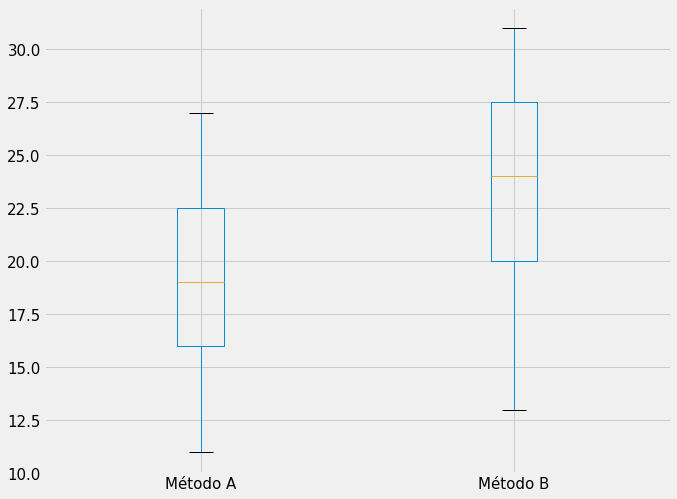

In [ ]:
#@title
boxplot = df.boxplot(column=['Método A', 
                             'Método B'],
                     #  grid=False, 
                     #  rot=45, 
                     fontsize=15,
                     figsize = (10,8)
                    )

In [ ]:
#@title
df.describe()

,Método A,Método B
count,10.000000,10.000000
mean,19.100000,23.300000
std,4.817791,5.558777
min,11.000000,13.000000
25%,16.000000,20.000000
50%,19.000000,24.000000
75%,22.500000,27.500000
max,27.000000,31.000000


In [ ]:
#@title
#calculate interquartile range 
q1, q2, q3 = np.percentile(df['Método A'], [25 , 50, 75])
iqr = q3 - q1

q2_q1 = q2 - q1
q3_q2 = q3 - q2

print('Método A\n')
#display interquartile range 
print('Intervalo Interquartílico =', iqr, 'mg/L')
#display amplitude
print('Amplitude =', df['Método A'].max()-df['Método A'].min(), 'mg/L')
#simmetry
print('Q2 - Q1 =',q2_q1,'(mg/L)\nQ3 - Q2 =',q3_q2,'mg/L\n')

print('Método B\n')
#calculate interquartile range 
q1, q2, q3 = np.percentile(df['Método B'], [25 , 50, 75])
iqr = q3 - q1

q2_q1 = q2 - q1
q3_q2 = q3 - q2

#display interquartile range 
print('Intervalo Interquartílico =', iqr, 'mg/L')
#display amplitude
print('Amplitude  =', df['Método B'].max()-df['Método B'].min(), 'mg/L')
#simmetry
print('Q2 - Q1 =',q2_q1,'(mg/L)\nQ3 - Q2 =',q3_q2,'mg/L\n')

Método A

Intervalo Interquartílico = 6.5 mg/L
Amplitude = 16 mg/L
Q2 - Q1 = 3.0 (mg/L)
Q3 - Q2 = 3.5 mg/L

Método B

Intervalo Interquartílico = 7.5 mg/L
Amplitude  = 18 mg/L
Q2 - Q1 = 4.0 (mg/L)
Q3 - Q2 = 3.5 mg/L



###Google Sheets

Gráfico boxplot disponível no link a seguir:
$$ \\ $$
https://docs.google.com/spreadsheets/d/1kxf8hvv1NDkAEkuqXO4zETJ2VeuP7qAKj6YzB5A-fIE/edit?usp=sharing

###Interpretação dos resultados

A mediana da concentração de Ca no método A (Q2 = 19 mg/L) é menor que no método B (Q2 = 24 mg/L).
$$ \\ $$
A dispersão dos dados pode ser representada pelo intervalo interquartílico que é a diferença entre o terceiro quartil e o primeiro quartil (tamanho da caixa), ou ainda pela amplitude que é calculada da seguinte maneira: valor máximo – valor mínimo. O Método A é o mais eficiente, pois apresenta a menor variabilidade, isto é, menores valore sde Intervalo Interquartílico e Amplitude comparativamente ao Método B.
$$ \\ $$
Um conjunto de dados que tem uma distribuição simétrica, terá a linha da mediana no centro do retângulo. Quando a linha da mediana está próxima ao primeiro quartil, os dados são assimétricos positivos e quando a posição da linha da mediana é próxima ao terceiro quartil, os dados são assimétricos negativos. Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos. Neste caso, tanto o Método A quanto o Método B são assimétricos. O Método A apresenta assimetria negativa e o Método B apresenta assimetria positiva.
 


##Parâmetros Clínicos

In [ ]:
#@title
ws['O2'].value

'A Tabela contém parâmetros clínicos de pacientes infartados. Obtenha o box-plot para cada um desses parâmetros e interprete os resultados.'

In [ ]:
#@title
# Read the cell values into a list of lists
data_rows = []
for row in ws['O3':'R11']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)
# Transform into dataframe
df = pd.DataFrame(data_rows)
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df = df.astype('int64')
# df.head()

In [ ]:
#@title
print('Parâmetros clínicos de pacientes infartado\n')
df.head()

Parâmetros clínicos de pacientes infartado



,LDL,HDL,Colesterol total_CT,Triglicedídeos_TG
1,132,49,208,152
2,110,44,170,70
3,123,41,188,129
4,161,38,237,214
5,176,41,279,414


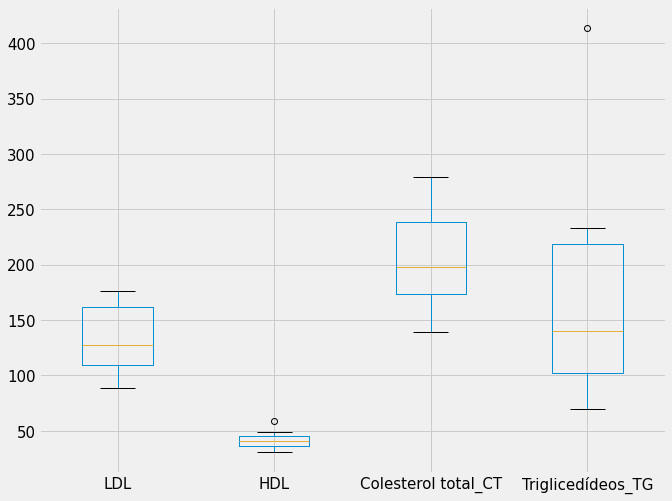

In [ ]:
#@title
boxplot = df.boxplot(column=['LDL', 
                             'HDL', 
                             'Colesterol total_CT', 
                             'Triglicedídeos_TG'],
                  #  grid=False, 
                  #  rot=45, 
                    fontsize=15,
                    figsize = (10,8)
                    )

In [ ]:
#@title
df.describe()

,LDL,HDL,Colesterol total_CT,Triglicedídeos_TG
count,8.000000,8.00000,8.000000,8.000000
mean,132.875000,42.00000,205.125000,175.125000
std,30.879663,8.96023,46.103726,112.831654
min,89.000000,31.00000,139.000000,70.000000
25%,109.750000,36.75000,173.750000,102.250000
50%,127.500000,41.00000,198.000000,140.500000
75%,161.500000,45.25000,239.000000,218.750000
max,176.000000,59.00000,279.000000,414.000000


In [ ]:
#@title
print('LDL\n')
#calculate interquartile range 
q1, q2, q3 = np.percentile(df['LDL'], [25 , 50, 75])
iqr = q3 - q1

q2_q1 = q2 - q1
q3_q2 = q3 - q2

#display interquartile range 
print('Intervalo Interquartílico =', iqr)
#display amplitude
print('Amplitude =', df['LDL'].max()-df['LDL'].min())
#simmetry
print('Q2 - Q1 =',q2_q1,'\nQ3 - Q2 =',q3_q2,'\n')

print('HDL\n')
#calculate interquartile range 
q1, q2, q3 = np.percentile(df['HDL'], [25 , 50, 75])
iqr = q3 - q1

q2_q1 = q2 - q1
q3_q2 = q3 - q2

#display interquartile range 
print('Intervalo Interquartílico =', iqr)
#display amplitude
print('Amplitude  =', df['HDL'].max()-df['HDL'].min())
#simmetry
print('Q2 - Q1 =',q2_q1,'\nQ3 - Q2 =',q3_q2,'\n')

print('Colesterol total_CT\n')
#calculate interquartile range 
q1, q2, q3 = np.percentile(df['Colesterol total_CT'], [25 , 50, 75])
iqr = q3 - q1

q2_q1 = q2 - q1
q3_q2 = q3 - q2

#display interquartile range 
print('Intervalo Interquartílico =', iqr)
#display amplitude
print('Amplitude  =', df['Colesterol total_CT'].max()-df['Colesterol total_CT'].min())
#simmetry
print('Q2 - Q1 =',q2_q1,'\nQ3 - Q2 =',q3_q2,'\n')

print('Triglicedídeos_TG\n')
#calculate interquartile range 
q1, q2, q3 = np.percentile(df['Triglicedídeos_TG'], [25 , 50, 75])
iqr = q3 - q1

q2_q1 = q2 - q1
q3_q2 = q3 - q2

#display interquartile range 
print('Intervalo Interquartílico =', iqr)
#display amplitude
print('Amplitude  =', df['Triglicedídeos_TG'].max()-df['Triglicedídeos_TG'].min())
#simmetry
print('Q2 - Q1 =',q2_q1,'\nQ3 - Q2 =',q3_q2,'\n')

LDL

Intervalo Interquartílico = 51.75
Amplitude = 87
Q2 - Q1 = 17.75 
Q3 - Q2 = 34.0 

HDL

Intervalo Interquartílico = 8.5
Amplitude  = 28
Q2 - Q1 = 4.25 
Q3 - Q2 = 4.25 

Colesterol total_CT

Intervalo Interquartílico = 65.25
Amplitude  = 140
Q2 - Q1 = 24.25 
Q3 - Q2 = 41.0 

Triglicedídeos_TG

Intervalo Interquartílico = 116.5
Amplitude  = 344
Q2 - Q1 = 38.25 
Q3 - Q2 = 78.25 



###Interpretação dos Resultados

O parâmetro clínico HDL foi o que apresentou a menor mediana (Q2 = 41), este parâmetro também apresentou a menor dispersão (Intervalo Interquartílico = 8,5 e
Amplitude  = 28). Ademais, é o único parâmetro com distribuição simétrica (Q2 - Q1 = Q3 - Q2 = 4,25). Entretanto, este conjunto de dados apresenta um valor outlier (uma observação que apresenta um grande afastamento das demais da série), representado por um ponto acima do limite superior, assim como o conjunto Triglicerídeos.

#Ramo e folhas

In [ ]:
#@title
!pip install stemgraphic
gc.output.clear()
import stemgraphic as stem

# """
# The leftmost column in the above plot is the frequency count. 
# Continuing in the same way, there is total of 10 observations 
# which is at the top in the same column. Then after a vertical line, 
# there are two values, one at bottom most we have XXX. While at the 
# topmost we have XXX, these values are nothing but the minimum and maximum 
# values respectively in the given data set. After that, we have the 
# stem values and following that we have leaves values separating 
# stem by the vertical line.
# """

##Diagrama 1

In [ ]:
#@title
ws = wb['ramo e folhas']
ws['A24'].value

'Quantas amostras apresentaram  concentrações maior que 50 mg/kg'

In [ ]:
#@title
# Read the cell values into a list of lists
data_rows = []
for row in ws['A28':'A63']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)
# Transform into dataframe
df = pd.DataFrame(data_rows)
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df = df.astype('int64')
df.head()

,Amostras ordenadas sem valores repetidos
1,10
2,15
3,18
4,19
5,12


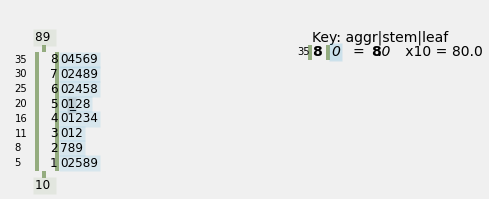

In [ ]:
#@title
stem.stem_graphic(df['Amostras ordenadas sem valores repetidos'],
                  scale =10,
                  )

plt.show()

In [ ]:
#@title
amostra = df['Amostras ordenadas sem valores repetidos']

r = sum(i > 50 for i in amostra)
print('Resposta:', r, 'amostras apresentaram  concentração maior que 50 mg/kg.')

Resposta: 18 amostras apresentaram  concentração maior que 50 mg/kg.


##Diagrama 2

In [ ]:
#@title
ws = wb['ramo e folhas']
ws['D2'].value

'O conjunto de dados a seguir lista os números de mensagens de tex_x0002_to enviadas, na semana passada, por usuários de telefonia celular em um andar de um dormitório universitário. Coloque os dados em um diagrama de ramo e folha. Descreva quaisquer padrões. '

In [ ]:
#@title
data = {'usuarios':  list(range(1,50+1)),
        'num_msg': [155,	159,	144,	129,	105,	145,	126,	116,	130,	114,
                    122,	112,	112,	142,	126,	118,	118,	108,	122,	121,
                    109,	140,	126,	119,	113,	117,	118,	109,	109,	119,
                    139,	139,	122,	78,	133,	126,	123,	145,	121,	134,
                    124,	119,	132,	133,	124,	129,	112,	126,	148,	147]
        }

df = pd.DataFrame(data)

df.head()

,usuarios,num_msg
0,1,155
1,2,159
2,3,144
3,4,129
4,5,105


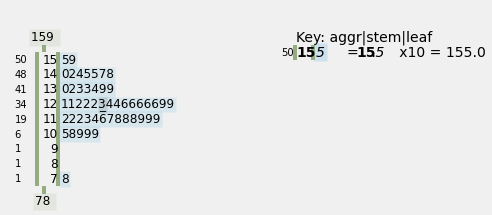

In [ ]:
#@title
stem.stem_graphic(df['num_msg'],
                  scale =10,
                  )

plt.show()

###Interpretação dos resultados

Número de elementos: 50
$$ \\ $$
Amplitude = máx - mín = 159 - 78 = 81
$$ \\ $$
Mediana = 123 (valor sublinhado)
$$ \\ $$
121-129: Intervalo com maior número de elementos
$$ \\ $$
Grágico de Ramo e Folhas Assimétrico: os valores estão concentrados na parte superior do diagrama.

#Diagrama de pontos

In [ ]:
#@title
ws = wb['Diagrama de pontos']
ws['C4'].value

'Use um diagrama de pontos para organizar o conjunto de dados abiaxo. Descreva quaisquer padrões.'

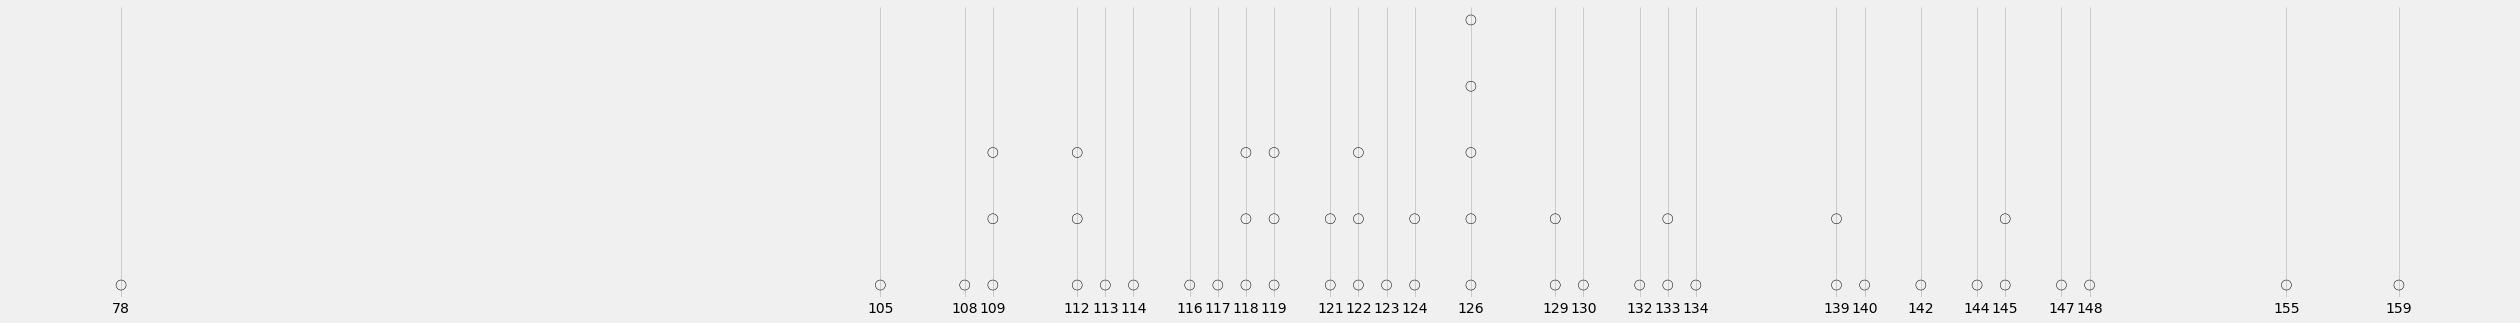

In [ ]:
#@title
def generate_points_for_dotplot(arr):
    freq = np.unique(arr,return_counts=True)
    ls = []
    for (value, count) in zip(freq[0],freq[1]):
        ls += [(value,num) for num in range(count)]
    x = [x for (x,y) in ls]
    y = [y for (x,y) in ls]
    return np.array([x,y])

arr = df['num_msg']
# arr = np.random.randint(1,21,size=100)
x,y = generate_points_for_dotplot(arr)

# Plotting
fig,ax = plt.subplots(figsize = (40,5)) # max(x)/3
ax.scatter(x,y,s=100,facecolors='none',edgecolors='black')
ax.set_xticks(np.unique(x))
ax.yaxis.set_visible(False)
# removing the spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
plt.show()

##Interpretação

moda = 126
$$ \\ $$
mínimo = 78
$$ \\ $$
máximo = 159
$$ \\ $$
Amplitude = máx - mín = 159 - 78 = 81
$$ \\ $$
Distribuição Assimétrica

#Case 1

In [ ]:
#@title
ws = wb['Case 1']
ws['K1'].value

'Considere o tempo de aquisição de dados de um equipamento de espectrometria de absorção atômica, apresentados na Tabela ao lado, determine:'

In [ ]:
#@title
# Read the cell values into a list of lists
data_rows = []
for row in ws['B2':'I27']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)
# Transform into dataframe
df = pd.DataFrame(data_rows)
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df = df.astype('int64')
df_1 = df.iloc[:,[0,1]]
df_2 = df.iloc[:,[2,3]]
df_3 = df.iloc[:,[4,5]]
df1 = pd.concat([df_1, df_2], ignore_index=True)
df = pd.concat([df1, df_3], ignore_index=True)
df.head()

,Experimento,t (s)
0,1,70
1,2,78
2,3,74
3,4,74
4,5,63


##a) Diagrama de pontos	

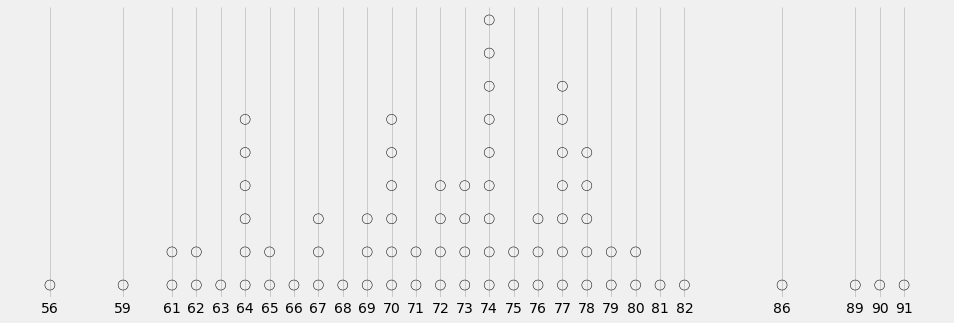

In [ ]:
#@title
def generate_points_for_dotplot(arr):
    freq = np.unique(arr,return_counts=True)
    ls = []
    for (value, count) in zip(freq[0],freq[1]):
        ls += [(value,num) for num in range(count)]
    x = [x for (x,y) in ls]
    y = [y for (x,y) in ls]
    return np.array([x,y])

arr = df['t (s)']
# arr = np.random.randint(1,21,size=100)
x,y = generate_points_for_dotplot(arr)

# Plotting
fig,ax = plt.subplots(figsize = (15,5)) # max(x)/3
ax.scatter(x,y,s=100,facecolors='none',edgecolors='black')
ax.set_xticks(np.unique(x))
ax.yaxis.set_visible(False)
# removing the spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
plt.show()

###Interpretação

moda = 74
$$ \\ $$
mínimo = 56
$$ \\ $$
máximo = 91
$$ \\ $$
Amplitude = máx - mín = 91 - 56 = 35
$$ \\ $$
Distribuição Assimétrica

##b) Diagrama de caule folha		

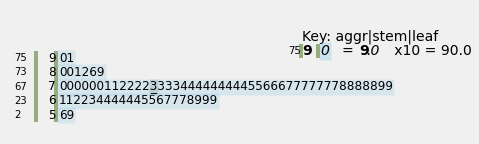

In [ ]:
#@title
stem.stem_graphic(df['t (s)'], scale =10)
plt.show()

###Interpretação

Número de elementos: 75
$$ \\ $$
Amplitude = máx - mín = 91 - 56 = 35
$$ \\ $$
Mediana = 73 (valor sublinhado)
$$ \\ $$
70-79: Intervalo com maior número de elementos
$$ \\ $$
Grágico de Ramo e Folhas Assimétrico: os valores não estão uniformemente distribuídos ao longo do diagrama.

##c) Tabela de frequências absoluta e relativas				

In [ ]:
#@title
#Set bin sizes
step = 6
bins = list(range(df['t (s)'].min() - step, df['t (s)'].max() + step, step))

#Number of intervals
# n_int = (df['t (s)'].max()+step - df['t (s)'].min()-step) / step
# print('Número de intervalos:', round(n_int + 1))

#Give list
sample = df['t (s)']

df.rename(columns={'t (s)' : 'nums'}, inplace = True)

#Put into dataframe
newdf = pd.DataFrame(pd.cut(df['nums'], bins=bins).value_counts()).sort_index()
newdf.reset_index(inplace=True)

#Convert to String
newdf['index'] = newdf['index'].astype(str)

#Set 'easy-to-read' names for bins
left = newdf['index'].str.split(',').str[0].str.split('(').str[1].astype('int32') + 1
right = newdf['index'].str.split(',').str[1].str.split(']').str[0]

fullname = left.astype(str) + ' -' + right
newdf['index'] = fullname

#cummulative frequency
newdf['cumfreq'] = newdf['nums'].cumsum()

#relative frequency
newdf['relfreq'] = round(newdf['nums'] / newdf['nums'].sum()*100,1)

#cummulative relative frequency
newdf['cumrelfreq'] = round(newdf['relfreq'].cumsum())

#Add column names
newdf.columns =['Intervalo de tempo (s)', 
                'Frequência simples', 
                'Frequência simples acumulada',
                'Frequência relativa (%)', 
                'Frequência relativa acumulada (%)']

#Show frequency table
newdf

,Intervalo de tempo (s),Frequência simples,Frequência simples acumulada,Frequência relativa (%),Frequência relativa acumulada (%)
0,51 - 56,1,1,1.3,1.0
1,57 - 62,5,6,6.7,8.0
2,63 - 68,14,20,18.7,27.0
3,69 - 74,28,48,37.3,64.0
4,75 - 80,21,69,28.0,92.0
5,81 - 86,3,72,4.0,96.0
6,87 - 92,3,75,4.0,100.0


###Interpretação

Classe 4 (69 - 74): possui o maior número de elementos (28), 37,3% do total.
$$ \\ $$
Classe 5 (75 - 80	): possui mais de 90% da frequência relatica acumulada (92%).



##d) Histograma	

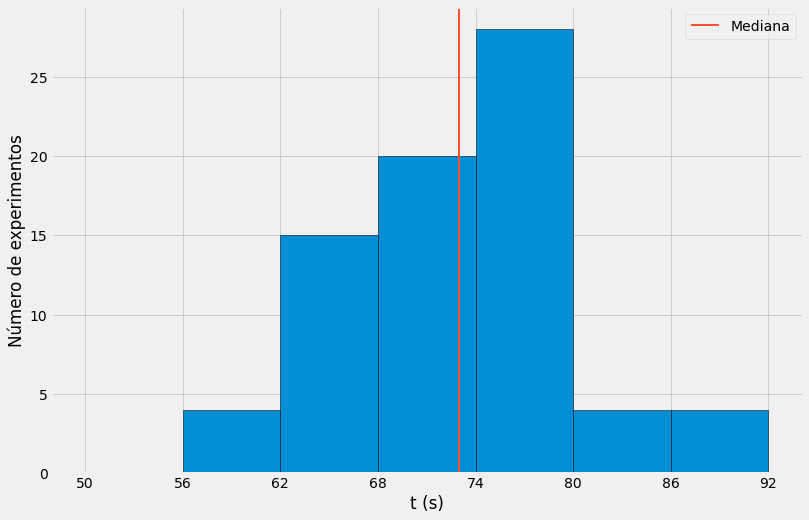

In [ ]:
#@title
df.rename(columns={'nums' : 't (s)'}, inplace = True)
amostra = df['t (s)']

plt.figure(figsize=(12,8))
plt.hist(amostra, bins=bins, edgecolor='black')
median_conc = amostra.median()
color='#fc4f30'

plt.axvline(median_conc,
            color=color,
            label='Mediana',
            linewidth=2
          )

plt.legend()
# plt.title('Temperatura de reação')
plt.xlabel('t (s)')
plt.ylabel('Número de experimentos')
plt.xticks(range(amostra.min()-6, amostra.max()+6, 6))
plt.show()

###Interpretação

Mediana = 73
$$ \\ $$
74-80: Intervalo com maior número de elementos
$$ \\ $$
Histograma Assimétrico: os valores não estão uniformemente distribuídos ao longo do diagrama.

##d) Box-plot	

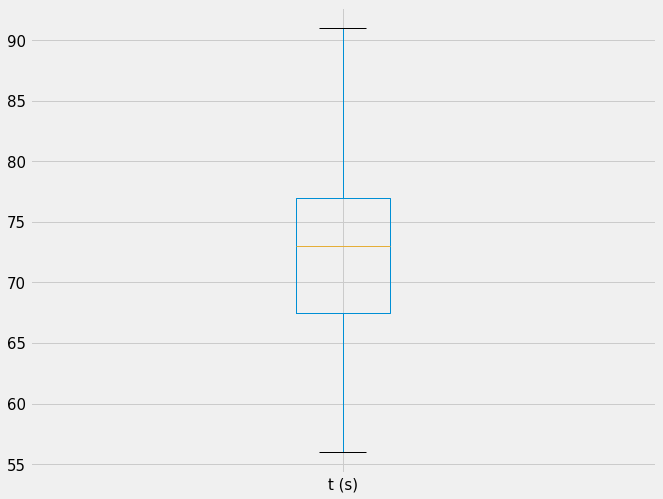

In [ ]:
#@title
boxplot = df.boxplot(column=['t (s)'],
                     #  grid=False, 
                     #  rot=45, 
                     fontsize=15,
                     figsize = (10,8)
                    )

###Interpretação

Distribuição Assimétrica (Q2 - Q1 ≠ Q3 - Q2).

In [ ]:
#@title
print('t (s)\n')
#calculate interquartile range 
q1, q2, q3 = np.percentile(df['t (s)'], [25 , 50, 75])
iqr = q3 - q1

q2_q1 = q2 - q1
q3_q2 = q3 - q2
#median
print('Mediana =', q2)
#display interquartile range 
print('Intervalo Interquartílico =', iqr)
#display amplitude
print('Amplitude =', df['t (s)'].max()-df['t (s)'].min())
#simmetry
print('Q2 - Q1 =',q2_q1,'\nQ3 - Q2 =',q3_q2,'\n')

t (s)

Mediana = 73.0
Intervalo Interquartílico = 9.5
Amplitude = 35
Q2 - Q1 = 5.5 
Q3 - Q2 = 4.0 



##e) Diagrama de Pareto		

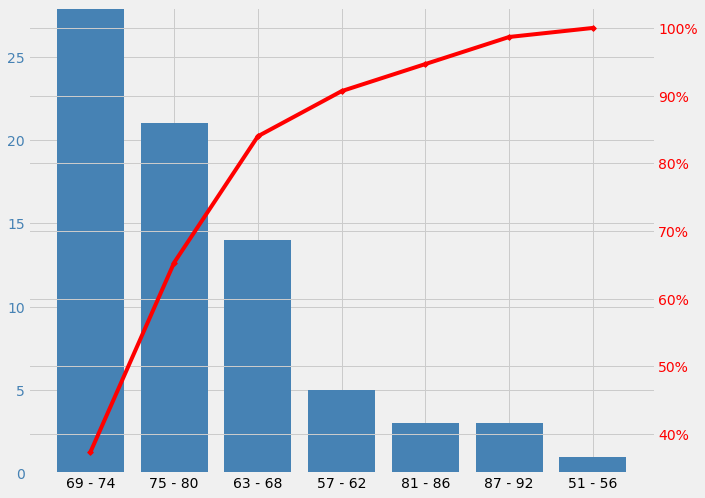

In [ ]:
#@title
df = newdf[['Intervalo de tempo (s)', 'Frequência simples']]
df.set_index('Intervalo de tempo (s)', inplace = True)

#sort DataFrame by count descending
df = df.sort_values(by='Frequência simples', ascending=False)

#add column to display cumulative percentage
df['cumperc'] = df['Frequência simples'].cumsum()/df['Frequência simples'].sum()*100

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(df.index, df['Frequência simples'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax.set_ylim(0, df['Frequência simples'].max())
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

###Interpretação

Um gráfico de Pareto é um gráfico de barras em que as barras são ordenadas da maior frequência de ocorrência para a menor frequência de ocorrência. 
$$ \\ $$
As três primeiras categorias (69-74, 75-80 e 63-68) representam juntas mais de 80% dos resultados obtidos.
$$ \\ $$
Um gráfico de Pareto ppermite classificar as categorias segundo a frequência de ocorrẽncia(da maior para a menor), enfatizando o grau de importância de cada categoria e priorizando os esforços de melhoria de qualidade.



In [ ]:
#@title
# """
# The x-axis displays the different brands 
# ordered from highest to lowest frequency.
# The left-hand y-axis shows the frequency of
# each brand and the right-hand y-axis shows 
# the cumulative frequency of the brands."""